<a href="https://colab.research.google.com/github/hermescosta/Hermes-2025-/blob/main/An%C3%A1lise_de_portf%C3%B3lio_RBras_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este estudo teve início no meu primeiro ano da graduação em Bacharelado em Estatística, com o objetivo de aplicar técnicas estatísticas descritivas em um contexto prático e acessível. A análise foi conduzida com foco na visualização e interpretação de dados de um portfólio de ações, permitindo uma compreensão mais intuitiva dos padrões de comportamento dos ativos. O trabalho foi apresentado na RBras 2023, realizada na cidade de Londrina, destacando-se pela abordagem visual e pela capacidade de extrair insights relevantes mesmo com ferramentas estatísticas iniciais.

# **Análise de Portfólio**

# Introdução

No campo da avaliação de investimentos, a compreensão do nível de risco associado a um ativo desempenha um papel fundamental. O risco é um fator crucial na determinação da taxa de desconto utilizada para trazer os fluxos de caixa futuros a valor presente. A taxa de desconto, por sua vez, reflete o risco ao qual o capital investido está exposto em uma empresa, afetando diretamente a avaliação de projetos e a tomada de decisão dos investidores.

No contexto dos investimentos, o risco está intimamente relacionado à probabilidade real de obter um retorno inferior ao esperado. Os investidores, conscientes desse risco, exigem uma taxa de retorno maior para compensar a incerteza e o potencial de perdas. Essa relação positiva entre risco e retorno esperado implica que projetos com maior volatilidade esperada exigiriam um prêmio de risco maior para atrair investidores.


# Objetivo

 Calcular estatísticas descritivas, como volatilidade, matriz de correlação, índice de Sharp e VaR, a fim de ajudar os investidores a compreender os riscos e retornos envolvidos na seleção de uma carteira de investimentos e, assim, minimizar perdas.

 Inicialmente importamos as bilbiotecas necessarias:



*   YFinance: permite acessar dados financeiros do Yahoo Finance diretamente no Python.
*   NumPy: biblioteca para computação numérica.
*   Matplotlib: para visualização gráfica dos dados, permitindo criar gráficos de linha, barras, histogramas...
*   Pandas: manipulação e análise dos dados.
*   Seaborn: biblioteca baseada no Matplotlib que facilita a criação de gráficos estatísticos bonitos e informativos com menos código e integração direta com Pandas.








In [22]:
# importar as bibliotecas
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Obtenção dos Dados

O portfólio analisado é composto pelos seguintes ativos da bolsa de valores brasileira: PETR4.SA, VALE3.SA, ITUB4.SA, BBDC4.SA e BBAS3.SA. Para cada um desses ativos, foram coletados os preços históricos de fechamento diário no período de 1º de janeiro de 2022 a 31 de dezembro de 2022. A coleta foi realizada utilizando a biblioteca yfinance, que permite acesso automatizado e direto à base de dados do Yahoo Finance, facilitando o processo de extração e manipulação das séries temporais financeiras.

Definimos abaixo o período de análise, que compreende do início ao fim do ano de 2022.
Essas datas serão utilizadas para filtrar os dados históricos de cada ativo.

In [23]:
# período de tempo
data_inicio = '2022-01-01'
data_fim = '2022-12-31'


Selecionamos os ativos que compõem o portfólio a ser analisado.
 Cada código representa uma ação negociada na B3.

In [24]:
# ações do portfólio
acoes = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'BBAS3.SA']


Utilizamos a função "download" da biblioteca yfinance para obter dados historicos, dos preços de fechamento das ações.

In [25]:
# dados históricos
dados = yf.download(acoes, start=data_inicio, end=data_fim)


/tmp/ipython-input-1658336929.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(acoes, start=data_inicio, end=data_fim)
[*********************100%***********************]  5 of 5 completed


Quantidade de linhas e colunas existentes no DataFrame.

In [26]:
# linhas e colunas existentes
dados.shape


(250, 25)

Vizualização das 5 primeiras linhas.

In [27]:
# inicio dados
dados.head()


Price           Close                                                   High  \
Ticker       BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA   BBAS3.SA   
Date                                                                           
2022-01-03  10.400712  13.459657  14.310646  10.281061  53.031822  10.739944   
2022-01-04  10.411538  13.547901  14.716475  10.319938  52.406315  10.519803   
2022-01-05  10.238317  13.452106  14.437055   9.920568  52.902637  10.458456   
2022-01-06  10.321318  13.643693  14.729787   9.913500  53.970066  10.415148   
2022-01-07  10.332145  13.842124  15.055788   9.959447  57.111198  10.400713   

Price                                                   ...       Open  \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  ...   BBAS3.SA   
Date                                                    ...              
2022-01-03  13.616880  14.510237  10.327006  54.371216  ...  10.512586   
2022-01-04  13.630010  14.756393  10.390622  53.759305  ...  10.508977   
2022-01-05  13.630008  14.783013  10.344676  53.494148  ...  10.400715   
2022-01-06  13.677906  14.796317  10.125553  54.629565  ...  10.256358   
2022-01-07  13.842124  15.069094   9.998324  57.111198  ...  10.324928   

Price                                                     Volume             \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  BBAS3.SA   BBDC4.SA   
Date                                                                          
2022-01-03  13.268255  14.084444  10.086679  53.711717  32338600   35620970   
2022-01-04  13.465793  14.383824  10.305800  53.378565  23429600  110060060   
2022-01-05  13.513686  14.696523  10.316402  52.603487  26325600   45808070   
2022-01-06  13.404210  14.397137   9.998322  53.466945  20271000   36651120   
2022-01-07  13.664222  14.696525   9.934707  54.663577  16377400   84778540   

Price                                     
Ticker      ITUB4.SA  PETR4.SA  VALE3.SA  
Date                                      
2022-01-03  37222335  52704700  18557200  
2022-01-04  49793763  51739200  18178700  
2022-01-05  35851405  78459800  22039000  
2022-01-06  40624734  61163100  22044100  
2022-01-07  48590177  47507600  35213100  

[5 rows x 25 columns]

Visualização das ultimas 5 linhas.

In [28]:
# final dados
dados.tail()


Price           Close                                                   High  \
Ticker       BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA   BBAS3.SA   
Date                                                                           
2022-12-23  14.273613  11.640631  17.425200  14.220348  64.321838  14.419262   
2022-12-26  14.253386  11.363843  17.079323  14.118452  64.910507  14.390943   
2022-12-27  13.780025  11.310019  16.982481  14.214688  66.460434  14.342392   
2022-12-28  14.026816  11.656012  17.328352  14.039195  66.311409  14.079412   
2022-12-29  14.051093  11.648320  17.293764  13.869368  66.229439  14.176514   

Price                                                   ...       Open  \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  ...   BBAS3.SA   
Date                                                    ...              
2022-12-23  11.748271  17.646560  14.276957  64.470867  ...  13.970177   
2022-12-26  11.632946  17.418280  14.322246  65.230924  ...  14.390943   
2022-12-27  11.517613  17.106996  14.327907  66.803205  ...  14.342392   
2022-12-28  11.709832  17.432114  14.333566  67.220500  ...  13.796205   
2022-12-29  11.902046  17.625805  14.180720  67.026755  ...  14.091552   

Price                                                     Volume            \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  BBAS3.SA  BBDC4.SA   
Date                                                                         
2022-12-23  11.494546  17.314519  13.659912  63.546876  17488800  21104200   
2022-12-26  11.602192  17.259178  14.220350  64.396348   9105400  13937200   
2022-12-27  11.486858  17.058574  14.293941  65.573697  17731600  78235200   
2022-12-28  11.340777  17.120827  14.209025  66.460444  21450400  45117800   
2022-12-29  11.725207  17.459784  14.146755  66.318860  18673000  41911700   

Price                                     
Ticker      ITUB4.SA  PETR4.SA  VALE3.SA  
Date                                      
2022-12-23  28695830  68387900  18656500  
2022-12-26  17822996  28765200  18407500  
2022-12-27  19491678  50803200  26720300  
2022-12-28  25715021  57293500  23314500  
2022-12-29  28098060  57901800  40110800  

[5 rows x 25 columns]

 Colunas DataFrame.

In [29]:
dados.columns

MultiIndex([( 'Close', 'BBAS3.SA'),
            ( 'Close', 'BBDC4.SA'),
            ( 'Close', 'ITUB4.SA'),
            ( 'Close', 'PETR4.SA'),
            ( 'Close', 'VALE3.SA'),
            (  'High', 'BBAS3.SA'),
            (  'High', 'BBDC4.SA'),
            (  'High', 'ITUB4.SA'),
            (  'High', 'PETR4.SA'),
            (  'High', 'VALE3.SA'),
            (   'Low', 'BBAS3.SA'),
            (   'Low', 'BBDC4.SA'),
            (   'Low', 'ITUB4.SA'),
            (   'Low', 'PETR4.SA'),
            (   'Low', 'VALE3.SA'),
            (  'Open', 'BBAS3.SA'),
            (  'Open', 'BBDC4.SA'),
            (  'Open', 'ITUB4.SA'),
            (  'Open', 'PETR4.SA'),
            (  'Open', 'VALE3.SA'),
            ('Volume', 'BBAS3.SA'),
            ('Volume', 'BBDC4.SA'),
            ('Volume', 'ITUB4.SA'),
            ('Volume', 'PETR4.SA'),
            ('Volume', 'VALE3.SA')],
           names=['Price', 'Ticker'])

Informações gerais do DataFrame: tipos das variáveis (float para números decimais e int para números inteiros) e verificação da existência de valores nulos.

In [30]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-01-03 to 2022-12-29
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, BBAS3.SA)   250 non-null    float64
 1   (Close, BBDC4.SA)   250 non-null    float64
 2   (Close, ITUB4.SA)   250 non-null    float64
 3   (Close, PETR4.SA)   250 non-null    float64
 4   (Close, VALE3.SA)   250 non-null    float64
 5   (High, BBAS3.SA)    250 non-null    float64
 6   (High, BBDC4.SA)    250 non-null    float64
 7   (High, ITUB4.SA)    250 non-null    float64
 8   (High, PETR4.SA)    250 non-null    float64
 9   (High, VALE3.SA)    250 non-null    float64
 10  (Low, BBAS3.SA)     250 non-null    float64
 11  (Low, BBDC4.SA)     250 non-null    float64
 12  (Low, ITUB4.SA)     250 non-null    float64
 13  (Low, PETR4.SA)     250 non-null    float64
 14  (Low, VALE3.SA)     250 non-null    float64
 15  (Open, BBAS3.SA)    250 non-null    fl

In [31]:

# só as colunas numéricas

sns.set_style('darkgrid')

num_cols = dados.select_dtypes(include=['int64', 'float64']).columns
print(len(num_cols), "variáveis numéricas")

25 variáveis numéricas


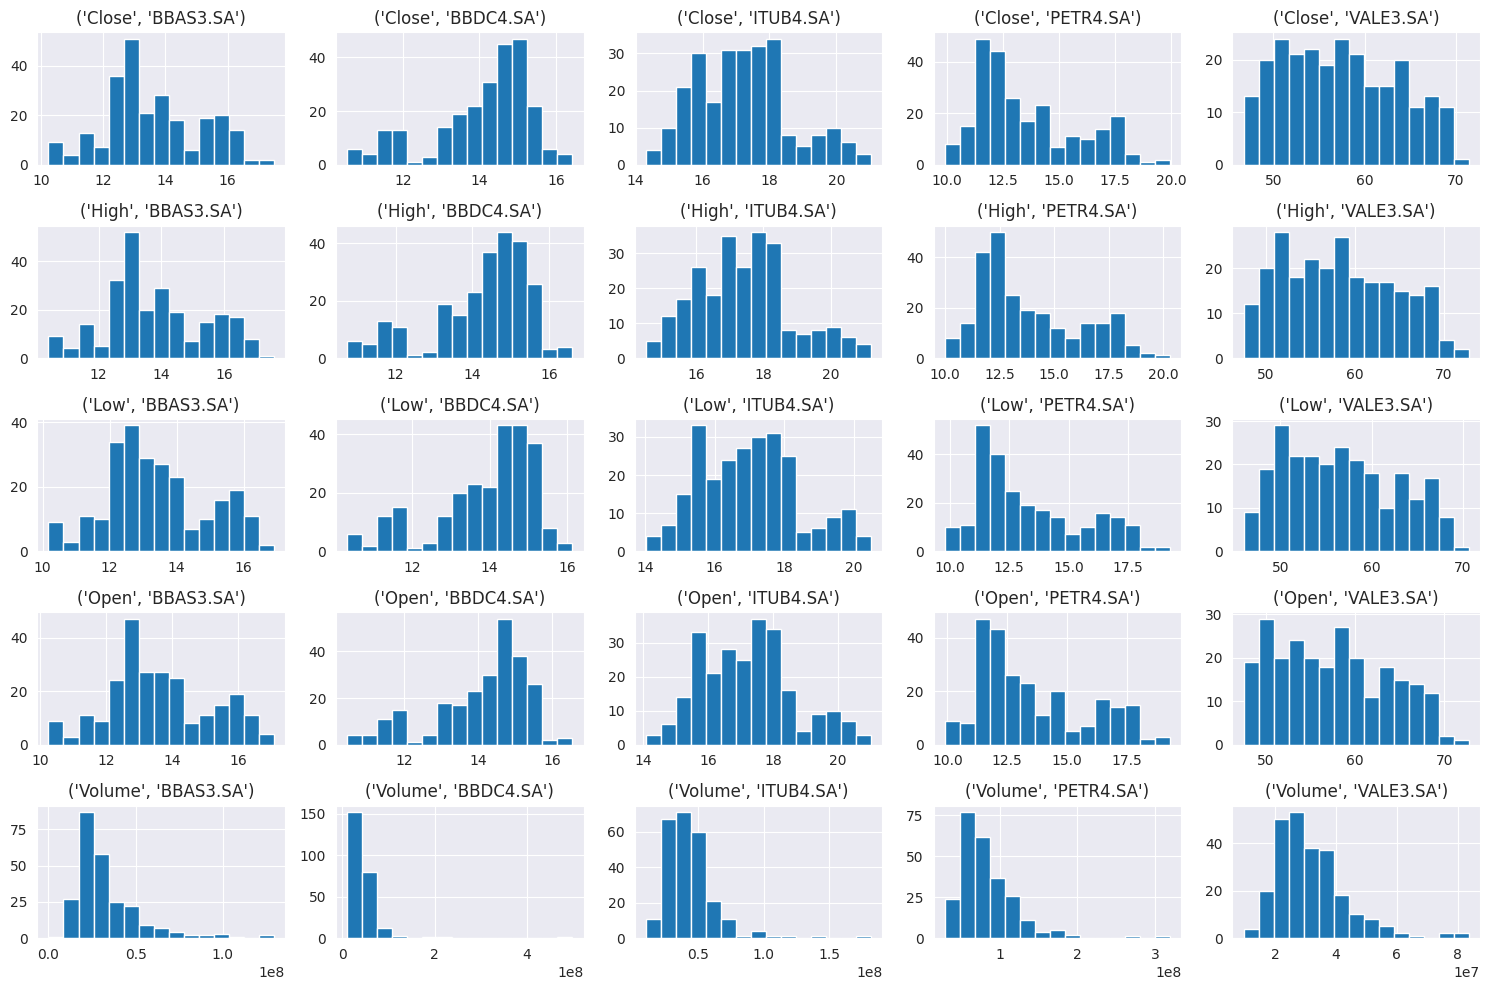

In [32]:
# Plota só as numéricas

dados[num_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Análises

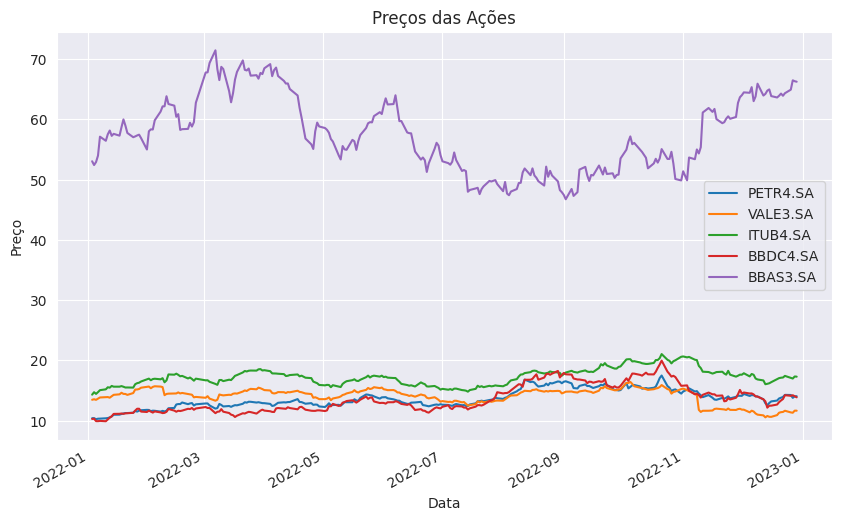

In [33]:
# Gráfico de preços das ações
dados['Close'].plot(title='Preços das Ações', figsize=(10, 6))
plt.ylabel('Preço')
plt.xlabel('Data')
plt.legend(acoes)
plt.show()

Em seguida, calcula-se a variação percentual diária do preço de cada ação, a qual é essencial para os cálculos das estatísticas descritivas

A variação percentual é dada por $ \frac{\text{Preço atual} - \text{Preço anterior}}{\text{Preço anterior}} $.


In [34]:

# Calcular os retornos percentuais diários
retornos = dados['Close'].pct_change()


Podendo ser calculadas a partir do desvio padrão, das variações percentuais diárias de cada ativo, indicando a magnitude da flotação do ativo em um determinado período de tempo, temos a volatilidade e seus respectivos resultados.

In [35]:

# Calcular a volatilidade (desvio padrão) dos retornos
volatilidades = retornos.std()


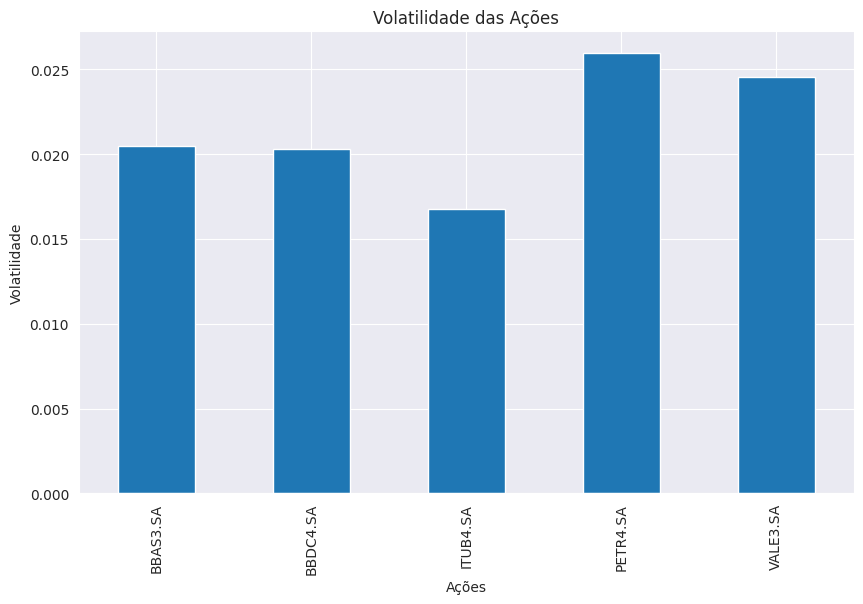

In [36]:
# Gráfico de volatilidade das ações
volatilidades.plot(kind='bar', title='Volatilidade das Ações', figsize=(10, 6))
plt.ylabel('Volatilidade')
plt.xlabel('Ações')
plt.show()



O grau de relacionamento entre duas variáveis, é determinado pelo coeficiente de Pearson, sendo o necessário para o cálculo, da matriz de correlação, a qual, permite uma boa visualização, da existência de uma correlação forte e positiva entre duas variáveis.    


A correlação de Pearson é dada por  
$ p = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum (x_i - \bar{x})^2}\sqrt{\sum (y_i - \bar{y})^2}} $.



In [37]:

# Calcular a matriz de correlação dos retornos
matriz_correlacao = retornos.corr()


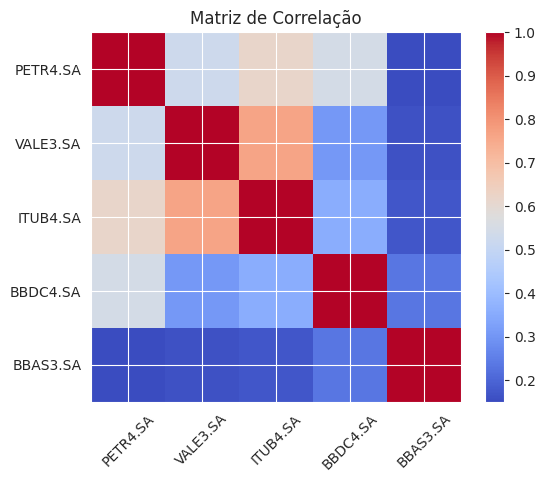

In [39]:
# Gráfico de matriz de correlação
plt.imshow(matriz_correlacao, cmap='coolwarm', interpolation='nearest')
plt.title('Matriz de Correlação')
plt.colorbar()
tick_marks = np.arange(len(acoes))
plt.xticks(tick_marks, acoes, rotation=45)
plt.yticks(tick_marks, acoes)
plt.show()

In [40]:
# Calcular a covariância dos retornos
covariancia = retornos.cov()

# Supondo que você já tenha os pesos das ações em um vetor
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

risco_sistematico = np.dot(pesos.T, np.dot(covariancia, pesos))
desvio_padrao_combinado = np.sqrt(risco_sistematico)

retorno_esperado = 0.1
retorno_livre_risco = 0.05

sharpe_ratio = (retorno_esperado - retorno_livre_risco) / desvio_padrao_combinado

nivel_confianca = 0.95
horizonte_tempo = 1  # Em dias

var = desvio_padrao_combinado * np.percentile(retornos.sum(axis=1), (1 - nivel_confianca) * 100) * np.sqrt(horizonte_tempo)
print(sharpe_ratio)

3.30380996247982


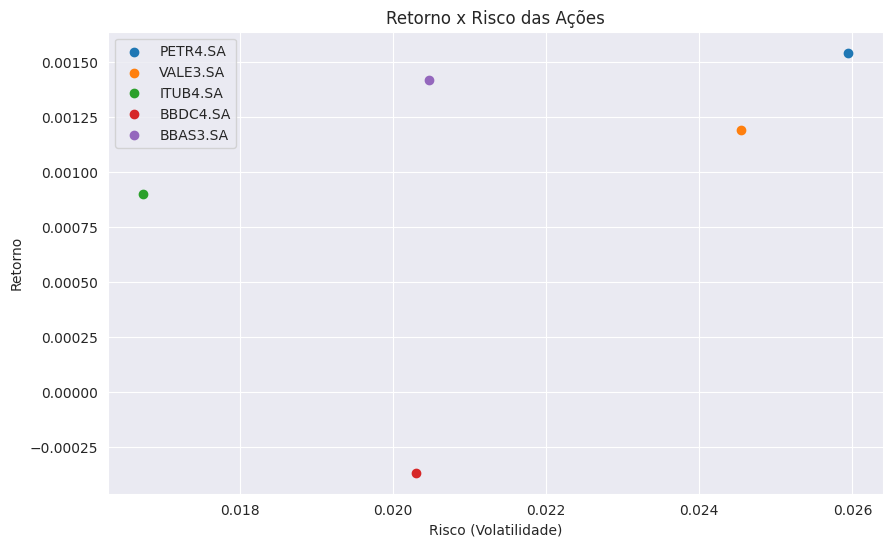

In [41]:
# Calcular a volatilidade (desvio padrão) dos retornos
volatilidades = retornos.std()

# Plotar o gráfico de retorno x risco para cada ação
plt.figure(figsize=(10, 6))
for i in range(len(acoes)):
    retorno = np.mean(retornos[acoes[i]])  # Retorno médio da ação
    risco = volatilidades[acoes[i]]  # Volatilidade da ação
    plt.scatter(risco, retorno, label=acoes[i])

plt.xlabel('Risco (Volatilidade)')
plt.ylabel('Retorno')
plt.title('Retorno x Risco das Ações')
plt.legend()
plt.grid(True)
plt.show()

# Conclusões

Portanto, com essa análise, foi possível evidenciar dentro do portfólio e períodos escolhidos, quais seriam os ativos que teriam uma tendência de comportamento mais parecida e tomar as devidas precações para que o risco do portfólio seja minimizado a fim de obter o maior retorno possível com o menor risco evidente.

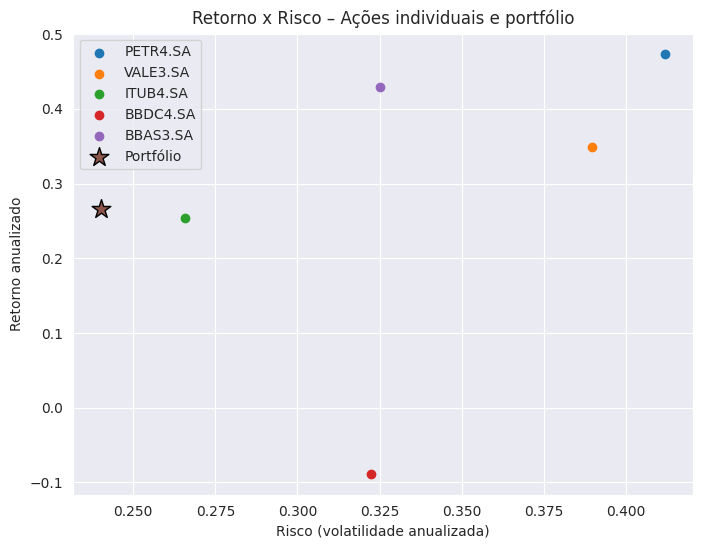

In [42]:
dias_ano = 252
retornos_medios = retornos.mean()
vols = retornos.std()

retornos_anual = (1 + retornos_medios) ** dias_ano - 1
vols_anual = vols * np.sqrt(dias_ano)

# retorno/risco do portfólio (usando o que calculei ali em cima)
retorno_anual_port = (1 + (retornos @ pesos).mean()) ** dias_ano - 1
vol_anual_port = (retornos @ pesos).std() * np.sqrt(dias_ano)

plt.figure(figsize=(8, 6))

# pontos das ações
for acao in acoes:
    plt.scatter(vols_anual[acao], retornos_anual[acao], label=acao)

# ponto do portfólio
plt.scatter(vol_anual_port, retorno_anual_port,
            marker="*", s=200, edgecolor="black", label="Portfólio")

plt.xlabel("Risco (volatilidade anualizada)")
plt.ylabel("Retorno anualizado")
plt.title("Retorno x Risco – Ações individuais e portfólio")
plt.legend()
plt.grid(True)
plt.show()
